# Linear Algebra in Action: Image Compression via SVD
In this notebook, we move from the theory of Matrices and Eigen-decomposition to a real-life application: **Image Compression**. 

### The Theory
An image is just a matrix where each cell represents a pixel intensity. By using **Singular Value Decomposition (SVD)**, we can decompose an image matrix $A$ into:
$$A = U \Sigma V^T$$
Where $\Sigma$ contains the "Singular Values" (importance) of the data. By keeping only the top $k$ values, we compress the image.

### Imports and Configuration

In [8]:
import  numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Setting plot style for a clean look
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 12})


### Step 1: Data Acquisition

###  Data Acquisition & Grayscale Conversion
In Data Science, an image is a 2D grid of numbers. We convert the image to **Grayscale** to simplify it into a single matrix $A$, where each value represents the brightness of a pixel (0 for black, 255 for white).


In [9]:
# You can load images from Local path or url

img = Image.open('images.png').convert('L') # 'L' mode is grayscale

# Convert to NumPy Matrix
A = np.array(img)

print(f"Image Loaded Successfully")
print(f"Matrix Dimensions (Rows x Columns): {A.shape}")
print(f"Total Pixels to process: {A.size}")


Image Loaded Successfully
Matrix Dimensions (Rows x Columns): (200, 200)
Total Pixels to process: 40000


###  Step 2: The Mathematical Engine (SVD)

###  Singular Value Decomposition (SVD)
We now apply the "Theory to NumPy" bridge. We decompose matrix $A$ into three parts:
1. **U**: The "Column Space" (vertical patterns).
2. **Sigma ($\Sigma$ complement)**: The "Strength" of each pattern (the Singular Values).
3. **V-transpose ($V^T$)**: The "Row Space" (horizontal patterns).


In [10]:
# Applying the SVD transformation
U, s, Vh = np.linalg.svd(A, full_matrices=False)

print(f"SVD Computation Complete")
print(f"Shape of U (Left Singular Vectors): {U.shape}")
print(f"Number of Singular Values captured: {len(s)}")
print(f"Shape of Vh (Right Singular Vectors): {Vh.shape}")

# Let's see the  first 5 singular values (The most important 'DNA' of the image)
print(f"\nTop 5 Singular Values: {s[:5]}")

SVD Computation Complete
Shape of U (Left Singular Vectors): (200, 200)
Number of Singular Values captured: 200
Shape of Vh (Right Singular Vectors): (200, 200)

Top 5 Singular Values: [23085.27478395  6607.91024135  5015.53087398  2656.52793465
  2307.89250298]


###  Step 3: Analysis of Information

###  Scree Plot (Information Cumulative)
How many "Eigen-patterns" do we actually need to keep? We plot the singular values to see where the information starts to drop off. This is how we decide our compression level.

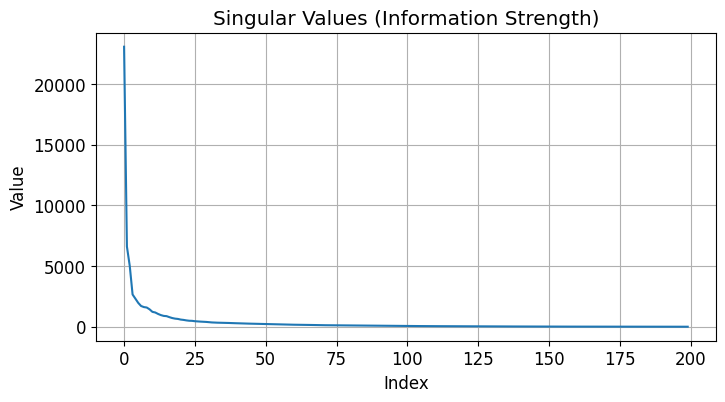

The first 50 singular values captured 99.86% of the image information!


In [11]:
plt.figure(figsize=(8, 4))
plt.plot(s)
plt.title("Singular Values (Information Strength)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# We Calculate the energy captured by the first 50 values
energy_50 = np.sum(s[:50]**2) / np.sum(s**2)
print(f"The first 50 singular values captured {energy_50*100:.2f}% of the image information!")

###  Step 4: Reconstruction & Compression

###  Reconstructing the Compressed Image
Now, we "throw away" the less important patterns and rebuild the image using only the top $k$ components.


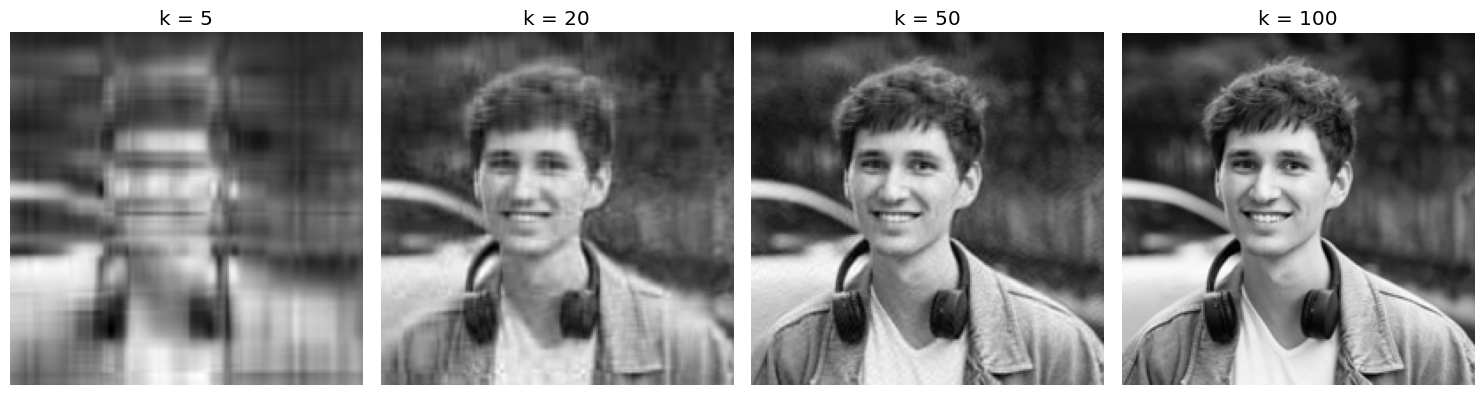

In [12]:
def compress_image(k):
    #  we reconstruct using only k components
    A_reconstructed = np.dot(U[:, :k], np.dot(np.diag(s[:k]), Vh[:k, :]))
    return A_reconstructed

# Test with different levels of k
k_values = [5, 20, 50, 100]

plt.figure(figsize=(15, 8))
for i, k in enumerate(k_values):
    plt.subplot(1, 4, i+1)
    compressed = compress_image(k)
    plt.imshow(compressed, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

###  Final Verdict

### Conclusion: Theory Met Reality
By using Linear Algebra, we reduced the storage required for this image significantly. 
Instead of storing **{A.size}** values, we only need to store $(U_{rows} \times k) + k + (V_{cols} \times k)$. 

**This is how Data Science turns heavy math into efficient technology.**
